In [1]:
import io
import numpy as np
import pandas as pd

In [98]:
# Run below code in case of LookupError, like: 
# "Resource punkt not found. Please use the NLTK Downloader to obtain the resource:"
# "Resource stopwords not found. Please use the NLTK Downloader to obtain the resource:"
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# In Windows 10, the data is downloaded to C:\Users\username\AppData\Roaming\nltk_data

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

## Data Loading

In [29]:
def load_train_data_file():
    try:
        train_file = io.open('data/1-sms-spam-train.txt', encoding='utf-8')
    except:
        print('Error reading training file..')

    lines = train_file.readlines()
    train_file.close()
    
    return lines

def process_train_data():
    lines = load_train_data_file()
    maxsplit=2
    data = []
    for line in lines:
        data.append(line.split('\t', maxsplit=maxsplit))
    return data

xtrain = pd.DataFrame(data=process_train_data(), columns=['target','sms'])
xtrain = xtrain.apply(lambda s : s.str.strip())
xtrain = xtrain[['sms','target']]
print(xtrain.shape)
print(xtrain['target'].value_counts())
xtrain.head(10)

(3000, 2)


,sms,target
0,"Did he say how fantastic I am by any chance, o...",ham
1,Black shirt n blue jeans... I thk i c ü...,ham
2,"If e timing can, then i go w u lor...",ham
3,They r giving a second chance to rahul dengra.,ham
4,I cant pick the phone right now. Pls send a me...,ham
5,"Haha good to hear, I'm officially paid and on ...",ham
6,Ffffffffff. Alright no way I can meet up with ...,ham
7,But i'm really really broke oh. No amount is t...,ham
8,Only 2% students solved this CAT question in '...,ham
9,<Forwarded from 21870000>Hi - this is your Mai...,spam


In [30]:
print(xtrain.iloc[9].sms)

<Forwarded from 21870000>Hi - this is your Mailbox Messaging SMS alert. You have 4 messages. You have 21 matches. Please call back on 09056242159 to retrieve your messages and matches


In [33]:
if('target' in xtrain.columns):
    ytrain = xtrain.pop('target')
print(ytrain.head())
print(xtrain.head())

0    ham
1    ham
2    ham
3    ham
4    ham
Name: target, dtype: object
                                                 sms
0  Did he say how fantastic I am by any chance, o...
1         Black shirt n blue jeans... I thk i c ü...
2              If e timing can, then i go w u lor...
3     They r giving a second chance to rahul dengra.
4  I cant pick the phone right now. Pls send a me...


In [36]:
test_file = io.open('data/1-sms-spam-test.txt', encoding='utf-8')
lines = test_file.readlines()
test_file.close()
xtest = pd.DataFrame(data=lines, columns=['sms'])
xtest = xtest.apply(lambda s : s.str.strip())
print(xtest.shape)
xtest.head()

(2574, 1)


,sms
0,Dear reached railway. What happen to you
1,Hello! How's you and how did saturday go? I wa...
2,Yes... I trust u to buy new stuff ASAP so I ca...
3,We're done...
4,Good Morning plz call me sir


## Data Visualization

In [46]:
spam_rows = xtrain.loc[ytrain=='spam']
spam_msgs = list(spam_rows.sms)
spam_words = ' '.join(spam_msgs)
spam_words

'<Forwarded from 21870000>Hi - this is your Mailbox Messaging SMS alert. You have 4 messages. You have 21 matches. Please call back on 09056242159 to retrieve your messages and matches You won\'t believe it but it\'s true. It\'s Incredible Txts! Reply G now to learn truly amazing things that will blow your mind. From O2FWD only 18p/txt sexy sexy cum and text me im wet and warm and ready for some porn! u up for some fun? THIS MSG IS FREE RECD MSGS 150P INC VAT 2 CANCEL TEXT STOP FREE camera phones with linerental from 4.49/month with 750 cross ntwk mins. 1/2 price txt bundle deals also avble. Call 08001950382 or call2optout/J MF Santa Calling! Would your little ones like a call from Santa Xmas eve? Call 09058094583 to book your time. Get the official ENGLAND poly ringtone or colour flag on yer mobile for tonights game! Text TONE or FLAG to 84199. Optout txt ENG STOP Box39822 W111WX £1.50 Congratulations! Thanks to a good friend U have WON the £2,000 Xmas prize. 2 claim is easy, just cal

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import STOPWORDS, WordCloud

stopwords = set(STOPWORDS)
stopwords.add("co")
stopwords.add("uk")

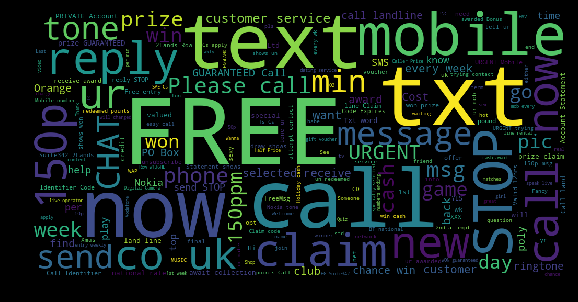

In [64]:
spam_wc = WordCloud(width=1024, height=512).generate(spam_words)

plt.figure(figsize=(12,4), facecolor='k') # facecolor implies background color
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

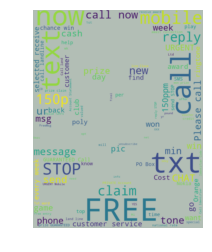

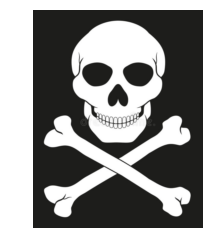

In [80]:
# read the mask image
image_skull = np.array(Image.open('image/skull_crossbones.jpg'))
spam_wc = WordCloud(width=1024, height=512, 
                    max_words=100, 
                    background_color='#b2beb5', #'#c2b280',
                    mask=image_skull, 
                    stopwords=stopwords)

# generate word cloud
spam_wc.generate(spam_words)

# store to file
spam_wc.to_file('image/skull_crossbones.png')

#show image
plt.figure()
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(image_skull, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

## Pre-processing
Before starting with training we must preprocess the messages.
* Make all characters lowercase
* Do stemming so that words like 'go', 'goes', 'gone', etc all mean the same 
* Remove STOP words, like 'so', 'to', etc.
* Optionally, use N-Grams to improve accuracy

In [178]:
from nltk import ngrams, everygrams, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer # Replacement to word_tokenize, that does not split contractions like - don't, isn't etc

def cleanse_message(message, lower_case=True, stem=True, stop_words=True, gram=2, min_word_length=1):
    # Remove Periods
    #message = message.replace('.',' ')
    table = str.maketrans('', '', string.punctuation)
    message = message.translate(table)
    
    # Convert to lower-case
    if lower_case:
        message = message.lower()
    
    # Tokenize a string to split off punctuation other than periods (The NLTK lib way)
    #words = word_tokenize(message)
    tt = TweetTokenizer()
    words = tt.tokenize(message)
    
    # Filter by minimum word length
    if(min_word_length>1):
        words = [w for w in words if len(w)>=min_word_length]
    
    # Discard  STOP words
    if(stop_words):
        sw = set(stopwords.words('english'))
        words = [word for word in words if word not in sw]
    
    # Do Stemming
    if(stem):
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]
    
    # N-grams for better semantics
    if(gram>1):
        words = everygrams(words, 1,gram) # t to "gram" N-grams
        words = list(words)
        words = np.asarray(words)
    
    return words

In [179]:
xtrain_words = list( map(lambda msg : cleanse_message(msg), 
    xtrain.sms) )
xtrain_words

[array([('say',), ('fantast',), ('chanc',), ('anyth',), ('need',),
        ('bigger',), ('life',), ('lift',), ('lose',), ('2',), ('live',),
        ('think',), ('would',), ('first',), ('person',), ('2',), ('die',),
        ('n',), ('v',), ('q',), ('say', 'fantast'), ('fantast', 'chanc'),
        ('chanc', 'anyth'), ('anyth', 'need'), ('need', 'bigger'),
        ('bigger', 'life'), ('life', 'lift'), ('lift', 'lose'),
        ('lose', '2'), ('2', 'live'), ('live', 'think'),
        ('think', 'would'), ('would', 'first'), ('first', 'person'),
        ('person', '2'), ('2', 'die'), ('die', 'n'), ('n', 'v'),
        ('v', 'q')], dtype=object),
 array([('black',), ('shirt',), ('n',), ('blue',), ('jean',), ('thk',),
        ('c',), ('ü',), ('black', 'shirt'), ('shirt', 'n'), ('n', 'blue'),
        ('blue', 'jean'), ('jean', 'thk'), ('thk', 'c'), ('c', 'ü')],
       dtype=object),
 array([('e',), ('time',), ('go',), ('w',), ('u',), ('lor',),
        ('e', 'time'), ('time', 'go'), ('go', 'w'), 

In [180]:
MessageCleanser().transform(xtrain.sms)

<class 'pandas.core.series.Series'>


array([array([('say',), ('fantast',), ('chanc',), ('anyth',), ('need',),
       ('bigger',), ('life',), ('lift',), ('lose',), ('2',), ('live',),
       ('think',), ('would',), ('first',), ('person',), ('2',), ('die',),
       ('n',), ('v',), ('q',), ('say', 'fantast'), ('fantast', 'chanc'),
       ('chanc', 'anyth'), ('anyth', 'need'), ('need', 'bigger'),
       ('bigger', 'life'), ('life', 'lift'), ('lift', 'lose'),
       ('lose', '2'), ('2', 'live'), ('live', 'think'),
       ('think', 'would'), ('would', 'first'), ('first', 'person'),
       ('person', '2'), ('2', 'die'), ('die', 'n'), ('n', 'v'),
       ('v', 'q')], dtype=object),
       array([('black',), ('shirt',), ('n',), ('blue',), ('jean',), ('thk',),
       ('c',), ('ü',), ('black', 'shirt'), ('shirt', 'n'), ('n', 'blue'),
       ('blue', 'jean'), ('jean', 'thk'), ('thk', 'c'), ('c', 'ü')],
      dtype=object),
       array([('e',), ('time',), ('go',), ('w',), ('u',), ('lor',),
       ('e', 'time'), ('time', 'go'), ('go', '

## Data Modeling

In [187]:
from sklearn.base import BaseEstimator, TransformerMixin
class MessageCleanser(BaseEstimator, TransformerMixin):
    """ TODO Document"""
    
    def fit(self, x, y=None):
        return self
    
    def transform(self, x):
        #print(type(x))
        lst = list( map(lambda msg : cleanse_message(msg), x) )
        return np.asarray(lst)

In [188]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

clf = Pipeline([
    ('msg_clnsr', MessageCleanser()),
#     ('ifidvec', TfidfVectorizer()),
    ('mnb', MultinomialNB())
])

In [186]:
clf.fit(xtrain.sms, ytrain)
# preds = clf.predict(xtest.sms)
# op = pd.DataFrame(data=preds, columns=['target'])
# op.to_csv('data/submit.csv', header=['Label'], index_label=[])

ValueError: Expected 2D array, got 1D array instead:
array=[array([('say',), ('fantast',), ('chanc',), ('anyth',), ('need',),
       ('bigger',), ('life',), ('lift',), ('lose',), ('2',), ('live',),
       ('think',), ('would',), ('first',), ('person',), ('2',), ('die',),
       ('n',), ('v',), ('q',), ('say', 'fantast'), ('fantast', 'chanc'),
       ('chanc', 'anyth'), ('anyth', 'need'), ('need', 'bigger'),
       ('bigger', 'life'), ('life', 'lift'), ('lift', 'lose'),
       ('lose', '2'), ('2', 'live'), ('live', 'think'),
       ('think', 'would'), ('would', 'first'), ('first', 'person'),
       ('person', '2'), ('2', 'die'), ('die', 'n'), ('n', 'v'),
       ('v', 'q')], dtype=object)
 array([('black',), ('shirt',), ('n',), ('blue',), ('jean',), ('thk',),
       ('c',), ('ü',), ('black', 'shirt'), ('shirt', 'n'), ('n', 'blue'),
       ('blue', 'jean'), ('jean', 'thk'), ('thk', 'c'), ('c', 'ü')],
      dtype=object)
 array([('e',), ('time',), ('go',), ('w',), ('u',), ('lor',),
       ('e', 'time'), ('time', 'go'), ('go', 'w'), ('w', 'u'),
       ('u', 'lor')], dtype=object)
 ...
 array([('finish',), ('work',), ('yet',), ('finish', 'work'),
       ('work', 'yet')], dtype=object)
 array([('today',), ('vodafon',), ('number',), ('end',), ('0089mi',),
       ('last',), ('four',), ('digit',), ('select',), ('receiv',), ('£',),
       ('350',), ('award',), ('number',), ('match',), ('pleas',),
       ('call',), ('09063442151',), ('claim',), ('£',), ('350',),
       ('award',), ('today', 'vodafon'), ('vodafon', 'number'),
       ('number', 'end'), ('end', '0089mi'), ('0089mi', 'last'),
       ('last', 'four'), ('four', 'digit'), ('digit', 'select'),
       ('select', 'receiv'), ('receiv', '£'), ('£', '350'),
       ('350', 'award'), ('award', 'number'), ('number', 'match'),
       ('match', 'pleas'), ('pleas', 'call'), ('call', '09063442151'),
       ('09063442151', 'claim'), ('claim', '£'), ('£', '350'),
       ('350', 'award')], dtype=object)
 array([('convey',), ('regard',), ('convey', 'regard')], dtype=object)].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [159]:
message = "This isn't good enough!"
table = str.maketrans('', '', string.punctuation)
message.translate(table)
message

"This isn't good enough!"